# COSC 3337 Lab 11 Minh Nguyen

## Explore the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [2]:
cc_df = pd.read_csv('cc.csv')
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Let's just drop the `CUST_ID`

In [4]:
cc_df.drop('CUST_ID', axis = 1, inplace=True) 

Since `MINIMUM_PAYMENTS` and `CREDIT_LIMIT` have some null values, we might need to replace them with the column means.

In [5]:
cc_df['MINIMUM_PAYMENTS'].fillna(value=cc_df['MINIMUM_PAYMENTS'].mean(), inplace = True) 
cc_df['CREDIT_LIMIT'].fillna(value=cc_df['CREDIT_LIMIT'].mean(), inplace = True) 

In [6]:
cc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
cc_df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
cc_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Implementation

We need to standardize and normalize the data

In [9]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler() 
scaled_df = scaler.fit_transform(cc_df) 
  
normalized_df = normalize(scaled_df) 

# Converting the scaled data back into a pandas DataFrame 
normalized_df = pd.DataFrame(data=normalized_df) 

We will reduce the dimensions of the data using PCA

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

X_principal.head()

,P1,P2
0,-0.489826,-0.679679
1,-0.518792,0.545009
2,0.330886,0.268980
3,-0.482374,-0.092111
4,-0.563289,-0.481915


In [11]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components = 3) 
X_principal1 = pca1.fit_transform(normalized_df) 
X_principal1 = pd.DataFrame(X_principal1) 
X_principal1.columns = ['P1', 'P2', 'P3'] 

X_principal1.head()

,P1,P2,P3
0,-0.489826,-0.679679,-0.097457
1,-0.518791,0.545011,0.196411
2,0.330885,0.268978,0.115879
3,-0.482374,-0.092113,0.453712
4,-0.563289,-0.481915,-0.256500


We'll use a `Dendrogram` to visualize the linkage of the reduced data (X_principal) using ***method='ward'***.

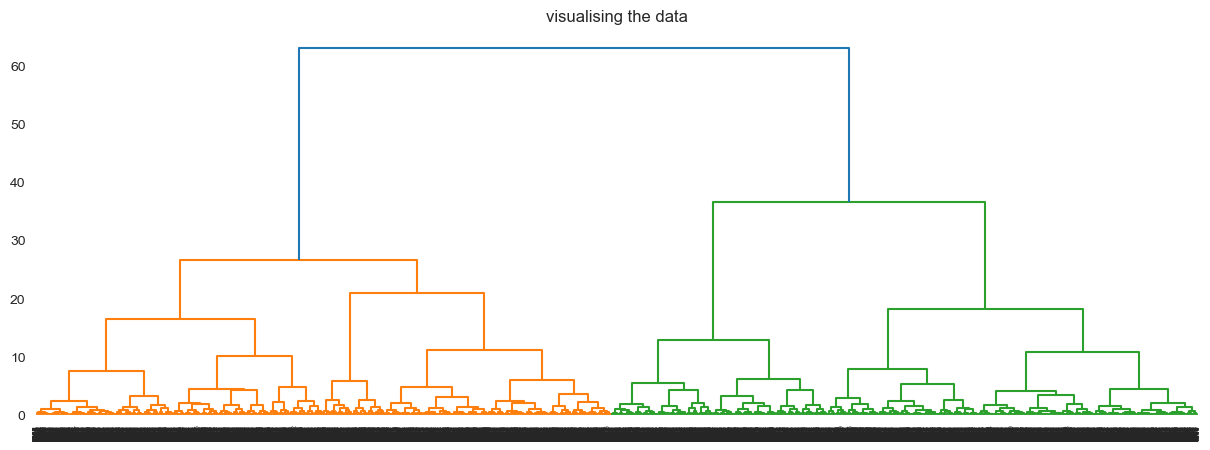

In [12]:
import scipy.cluster.hierarchy as shc

plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method='ward'))) 

Different linkage method

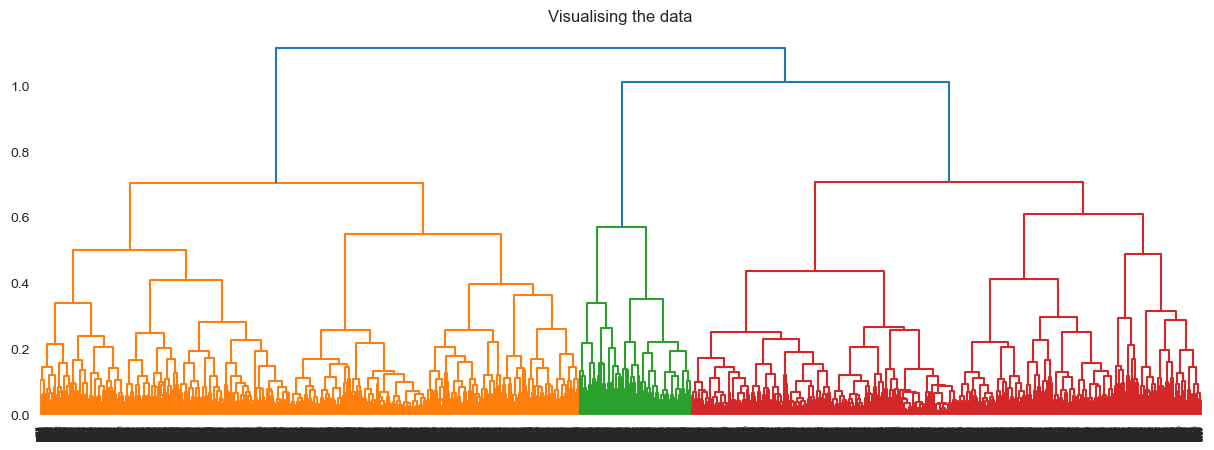

In [17]:
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method='average')))

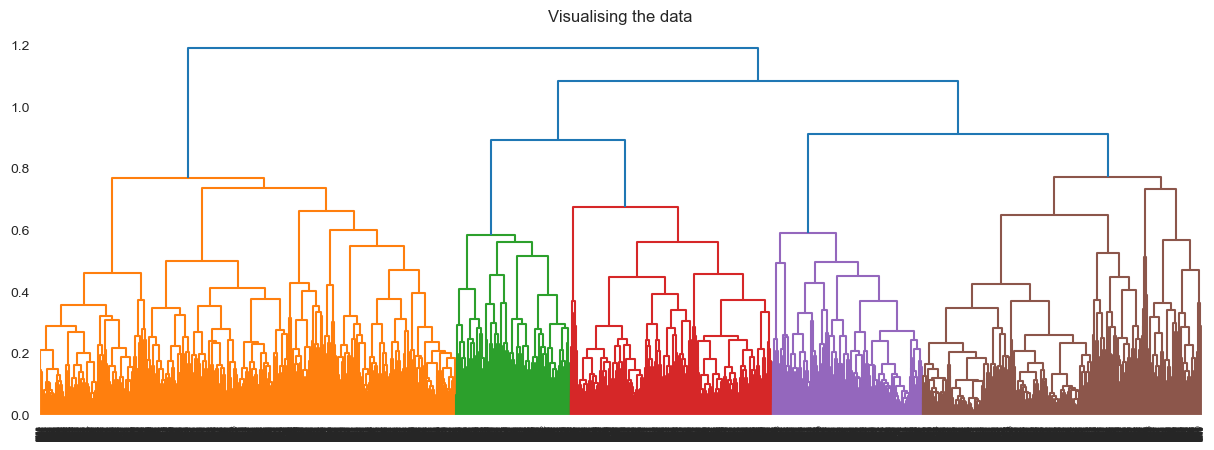

In [16]:
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal1, method='average')))

Determine the optimal number of clusters using `silhouette` score

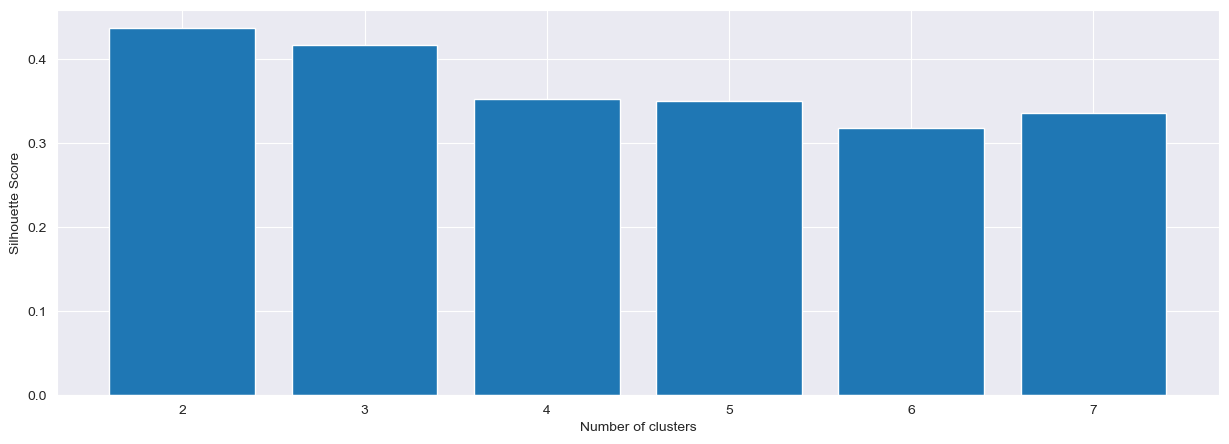

In [13]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

# where we'll save scores for later plotting
silhouette_scores = [] 

# testing different cluster values in range [2,8)
for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(X_principal,
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Creating bar graph to compare the results. You can use a line plot if you prefer (similar to K Means lab)
plt.bar(x=range(2, 8), height=silhouette_scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

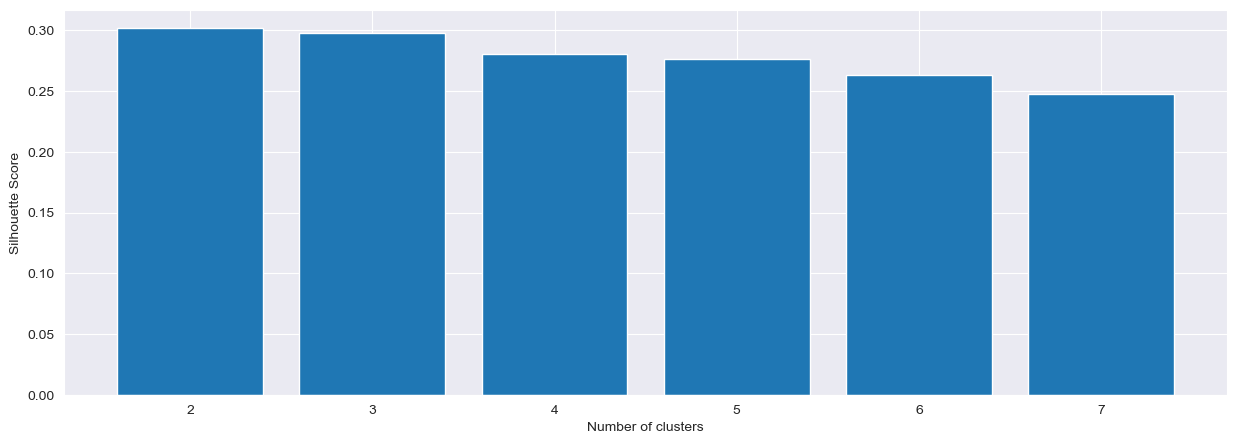

In [19]:
# where we'll save scores for later plotting
silhouette_scores1 = [] 

# testing different cluster values in range [2,8)
for n_cluster in range(2, 8):
    silhouette_scores1.append(silhouette_score(X_principal1,
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal1))) 
    
# Creating bar graph to compare the results.
plt.bar(x=range(2, 8), height=silhouette_scores1) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

Try with a line plot

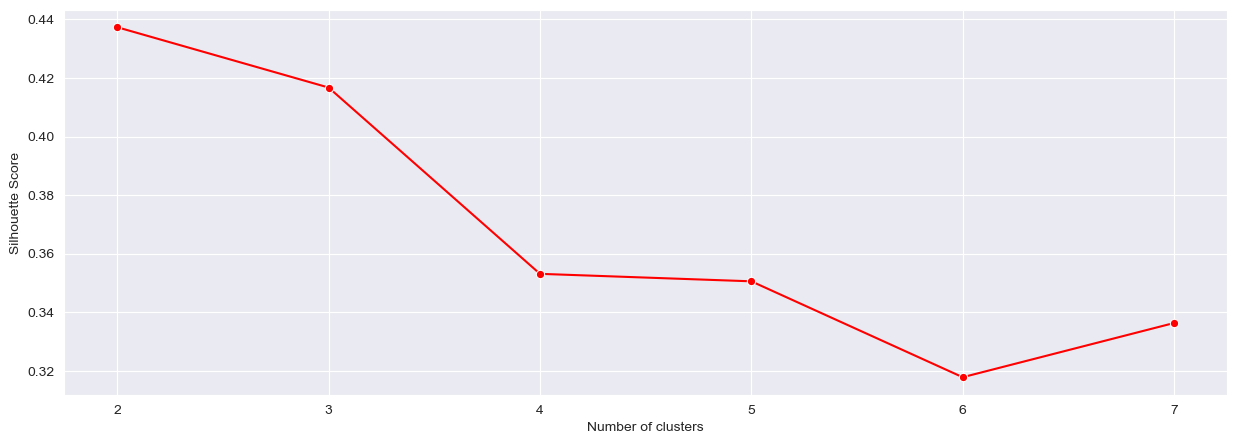

In [21]:
# where we'll save scores for later plotting
silhouette_scores = [] 

# testing different cluster values in range [2,8)
for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(X_principal,
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Creating bar graph to compare the results. You can use a line plot if you prefer (similar to K Means lab)
sns.lineplot(x=range(2, 8), y=silhouette_scores, marker='o', color='red') 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

In [14]:
# creating and fitting model
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

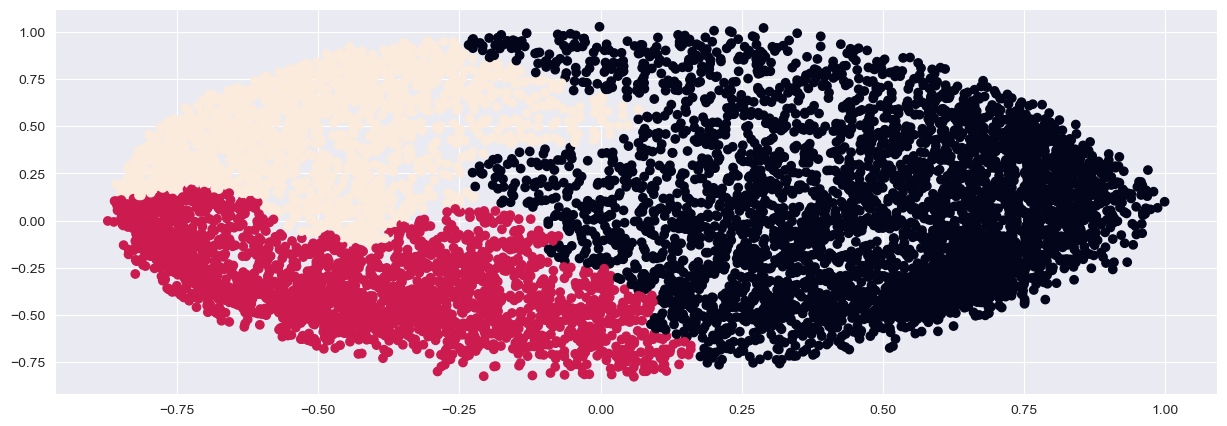

In [15]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal)) 
plt.show() 

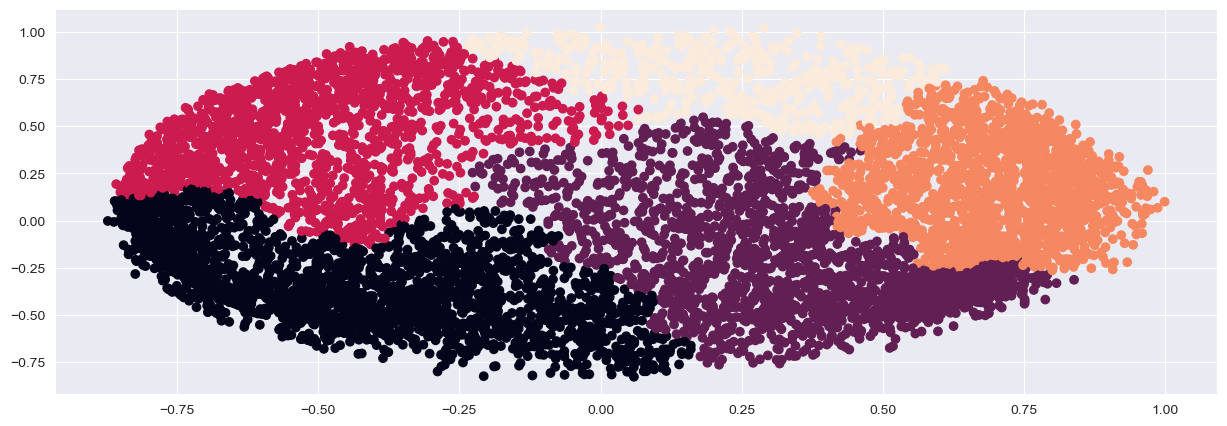

In [23]:
agg1 = AgglomerativeClustering(n_clusters=5)
agg1.fit(X_principal)

plt.scatter(X_principal['P1'], X_principal['P2'],
            c = agg1.fit_predict(X_principal)) 
plt.show() 